# Datawhale 零基础入门数据挖掘-Task2 数据分析

## EDA-数据探索性分析
本部分内容主要目的在于了解数据集的实际情况，了解内容包括但不限于了解各个特征的格式，分布，缺失值，相关性等情况。

## EDA目标

* EDA的价值主要在于熟悉数据集，了解数据集，对数据集进行验证来确定所获得数据集可以用于接下来的机器学习或者深度学习使用。

* 当了解了数据集之后我们下一步就是要去了解变量间的相互关系以及变量与预测值之间的存在关系。

* 引导数据科学从业者进行数据处理以及特征工程的步骤,使数据集的结构和特征集让接下来的预测问题更加可靠。

* 完成对于数据的探索性分析，并对于数据进行一些图表或者文字总结并打卡。

## 导入数据集与需要使用的库

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import copy
import warnings
import seaborn as sns #数据可视化
import missingno as msno #缺失值查看
import matplotlib.pyplot as plt #python图形显示库
import scipy.stats as st #分布拟合
warnings.filterwarnings('ignore')

#导入数据集
file_path = ''
train_file = 'formatted_used_car_train_20200313.csv'
test_file = 'formatted_used_car_testA_20200313.csv'
pd.set_option('display.max_columns', None)
df_train = pd.read_csv(file_path+train_file,header=0,index_col=0)
Train_data = df_train
df_test = pd.read_csv(file_path+test_file,header=0,index_col=0)
Test_data = df_test

## 常用分析部分及代码演示

### 1.数据总览

In [2]:
#数据集基本属性观察
df_train.head()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
SaleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,-,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [3]:
df_test.head()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
SaleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
150000,66932,20111212,222.0,4,5.0,1.0,1.0,313,15.0,0.0,1440,0,0,20160329,49.593127,5.246568,1.001130,-4.122264,0.737532,0.264405,0.121800,0.070899,0.106558,0.078867,-7.050969,-0.854626,4.800151,0.620011,-3.664654
150001,174960,19990211,19.0,21,0.0,0.0,0.0,75,12.5,1.0,5419,0,0,20160404,42.395926,-3.253950,-1.753754,3.646605,-0.725597,0.261745,0.000000,0.096733,0.013705,0.052383,3.679418,-0.729039,-3.796107,-1.541230,-0.757055
150002,5356,20090304,82.0,21,0.0,0.0,0.0,109,7.0,0.0,5045,0,0,20160308,45.841370,4.704178,0.155391,-1.118443,-0.229160,0.260216,0.112081,0.078082,0.062078,0.050540,-4.926690,1.001106,0.826562,0.138226,0.754033
150003,50688,20100405,0.0,0,0.0,0.0,1.0,160,7.0,0.0,4023,0,0,20160325,46.440649,4.319155,0.428897,-2.037916,-0.234757,0.260466,0.106727,0.081146,0.075971,0.048268,-4.864637,0.505493,1.870379,0.366038,1.312775
150004,161428,19970703,26.0,14,2.0,0.0,0.0,75,15.0,0.0,3103,0,0,20160309,42.184604,-3.166234,-1.572058,2.604143,0.387498,0.250999,0.000000,0.077806,0.028600,0.081709,3.616475,-0.673236,-3.197685,-0.025678,-0.101290


In [4]:
#数据统计值观察
Train_data.describe()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333,44.406268,-0.044809,0.080765,0.078833,0.017875,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477,2.457548,3.641893,2.929618,2.026514,1.193661,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000,30.451976,-4.295589,-4.470671,-7.275037,-4.364565,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000,43.135799,-3.192349,-0.970671,-1.462580,-0.921191,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000,44.610266,-3.052671,-0.382947,0.099722,-0.075910,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000,46.004721,4.000670,0.241335,1.565838,0.868758,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000,52.304178,7.320308,19.035496,9.854702,6.829352,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [5]:
Test_data.describe()

,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,5.000000e+04,50000.000000,50000.000000,48587.000000,47107.000000,48090.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,68542.223280,2.003393e+07,46.844520,8.056240,1.782185,0.373405,0.224350,119.883620,12.595580,2590.604820,0.0,0.0,2.016033e+07,44.418233,-0.037238,0.050534,0.084640,0.015001,0.248669,0.045021,0.122744,0.057997,0.062000,-0.017855,-0.013742,-0.013554,-0.003147,0.001516
std,61052.808133,5.368870e+04,49.469548,7.819477,1.760736,0.546442,0.417158,185.097387,3.908979,1876.970263,0.0,0.0,7.951521e+01,2.429950,3.642562,2.856341,2.026510,1.193026,0.044601,0.051766,0.195972,0.029211,0.035653,3.747985,3.231258,2.515962,1.286597,1.027360
min,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,2.015061e+07,28.987024,-4.137733,-4.205728,-5.638184,-4.287718,0.000000,0.000000,0.000000,0.000000,0.000000,-9.160049,-5.411964,-8.916949,-4.123333,-6.112667
25%,11203.500000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1030.000000,0.0,0.0,2.016031e+07,43.139621,-3.191909,-0.971266,-1.453453,-0.928089,0.243762,0.000044,0.062644,0.035084,0.033714,-3.700121,-1.971325,-1.876703,-1.060428,-0.437920
50%,52248.500000,2.003091e+07,29.000000,6.000000,1.000000,0.000000,0.000000,109.000000,15.000000,2219.000000,0.0,0.0,2.016032e+07,44.611084,-3.050756,-0.388117,0.097881,-0.070225,0.257877,0.000815,0.095828,0.057084,0.058764,1.613212,-0.355843,-0.142779,-0.035956,0.138799
75%,118856.500000,2.007110e+07,65.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3857.000000,0.0,0.0,2.016033e+07,45.992639,3.997323,0.240548,1.562700,0.863731,0.265328,0.102025,0.125438,0.079077,0.087489,2.832708,1.262914,1.764335,0.941469,0.681163
max,196805.000000,2.015121e+07,246.000000,39.000000,7.000000,6.000000,1.000000,20000.000000,15.000000,8121.000000,0.0,0.0,2.016041e+07,51.751684,7.553517,18.394570,9.381599,5.270150,0.291618,0.153265,1.358813,0.156355,0.214775,12.338872,18.856218,12.950498,5.913273,2.624622


In [6]:
#数据类型观察
Train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 30 columns):
name                 150000 non-null int64
regDate              150000 non-null int64
model                149999 non-null float64
brand                150000 non-null int64
bodyType             145494 non-null float64
fuelType             141320 non-null float64
gearbox              144019 non-null float64
power                150000 non-null int64
kilometer            150000 non-null float64
notRepairedDamage    150000 non-null object
regionCode           150000 non-null int64
seller               150000 non-null int64
offerType            150000 non-null int64
creatDate            150000 non-null int64
price                150000 non-null int64
v_0                  150000 non-null float64
v_1                  150000 non-null float64
v_2                  150000 non-null float64
v_3                  150000 non-null float64
v_4                  150000 non-null float64
v_5     

In [7]:
#数据取值观察
for i in range(Train_data.shape[1]):
    print(Train_data.columns[i])
    print(Train_data[Train_data.columns[i]].value_counts())
    print('\n')

name
708       282
387       282
55        280
1541      263
203       233
53        221
713       217
290       197
1186      184
911       182
2044      176
1513      160
1180      158
631       157
893       153
2765      147
473       141
1139      137
1108      132
444       129
306       127
2866      123
2402      116
533       114
1479      113
422       113
4635      110
725       110
964       109
1373      104
         ... 
89083       1
95230       1
164864      1
173060      1
179207      1
181256      1
185354      1
25564       1
19417       1
189324      1
162719      1
191373      1
193422      1
136082      1
140180      1
144278      1
146327      1
148376      1
158621      1
1404        1
15319       1
46022       1
64463       1
976         1
3025        1
5074        1
7123        1
11221       1
13270       1
174485      1
Name: name, Length: 99662, dtype: int64


regDate
20000008    180
20000011    158
20000004    157
20000010    157
20000002    155
20000009   

Name: v_0, Length: 143997, dtype: int64


v_1
-3.245133    20
 3.183323    16
 1.942732    15
 3.354949    15
 2.796739    15
 3.116688    15
 2.886858    14
 3.396244    14
 3.195363    14
 3.400295    12
 3.196137    12
-3.276149    11
 2.942478    11
 3.286442    11
 3.886811    11
 3.689488    11
 3.790849    10
 3.312380    10
 3.621191    10
 4.401306    10
-3.274868    10
 3.540994    10
 3.678694    10
 3.554861     9
 3.558752     9
 3.931098     9
-3.233905     9
 3.476742     9
-3.212543     9
 3.555961     8
             ..
-3.280657     1
 3.592148     1
-3.240434     1
 4.374652     1
 4.426121     1
-3.165139     1
-3.312615     1
 3.696081     1
 2.991618     1
 5.799775     1
-3.209732     1
-3.283163     1
-2.960679     1
 0.655802     1
 5.232964     1
 5.184979     1
-3.216072     1
-3.111052     1
 5.220566     1
 4.335679     1
 0.865471     1
-3.338176     1
 5.309824     1
 3.811175     1
 2.991164     1
 3.418050     1
-2.994782     1
-3.022811     1
-3.220458 

Name: v_8, Length: 142451, dtype: int64


v_9
0.000000    3486
0.014867      20
0.082765      16
0.101150      15
0.051535      15
0.045877      15
0.046765      15
0.049611      14
0.048203      14
0.110887      14
0.049351      12
0.101553      12
0.097584      11
0.051700      11
0.068842      11
0.126611      11
0.053952      11
0.125604      10
0.035969      10
0.043857      10
0.046122      10
0.075093      10
0.070500      10
0.087427      10
0.034042       9
0.061138       9
0.027598       9
0.145274       9
0.092350       9
0.061393       9
            ... 
0.024845       1
0.041220       1
0.049372       1
0.088486       1
0.158245       1
0.083452       1
0.019893       1
0.009610       1
0.061466       1
0.035637       1
0.037569       1
0.101576       1
0.108911       1
0.025725       1
0.077883       1
0.023675       1
0.058025       1
0.050549       1
0.072026       1
0.034553       1
0.028229       1
0.127818       1
0.081478       1
0.128725       1
0.129218       1
0.

In [8]:
for i in range(Test_data.shape[1]):
    print(Test_data.columns[i])
    print(Test_data[Test_data.columns[i]].value_counts())
    print('\n')

name
55        97
708       96
387       95
1541      88
713       74
53        72
1186      67
203       67
631       65
911       64
2044      62
2866      60
1139      57
893       54
1180      52
2765      50
1108      50
290       48
1513      47
691       45
473       44
299       43
444       41
422       39
964       39
1479      38
1273      38
306       36
725       35
4635      35
          ..
46786      1
48835      1
165572     1
68204      1
171719     1
59080      1
186062     1
11985      1
147155     1
134869     1
138967     1
173792     1
114403     1
59098      1
59144      1
40679      1
61161      1
128746     1
55022      1
143089     1
14066      1
147187     1
112892     1
46598      1
159481     1
22270      1
89855      1
42752      1
48899      1
11808      1
Name: name, Length: 37453, dtype: int64


regDate
20000004    60
20000011    56
20000012    54
20000009    53
20000005    50
20000003    49
20000008    48
20000007    47
19990305    45
20000010    45
19

Name: v_1, Length: 49186, dtype: int64


v_2
 1.160401     10
 1.016142      9
 0.790099      8
 1.079664      7
 0.935597      6
 0.159993      6
-0.349860      6
 0.936043      5
 0.600141      5
 1.151169      5
 0.705006      5
 0.783660      5
 0.273200      5
 1.078548      5
 0.289853      4
 0.743312      4
-0.028164      4
-0.850761      4
-2.247126      4
-0.930606      4
 0.503664      4
-0.288148      4
-1.440284      4
 0.625654      4
 0.672920      4
 0.980616      4
 0.470569      4
 0.433969      4
-0.149225      3
 16.709671     3
              ..
-0.036432      1
-0.191156      1
-1.361171      1
-0.549626      1
-0.722303      1
 0.172187      1
 1.140556      1
-1.118663      1
 0.559174      1
-0.184784      1
 1.023124      1
-0.553488      1
-0.042782      1
-0.768250      1
 0.071567      1
 15.871982     1
-0.443599      1
-0.612232      1
 0.629695      1
 0.218155      1
-0.253991      1
 0.489635      1
-0.573671      1
 0.704355      1
 0.344294      1
-1.

Name: v_9, Length: 48063, dtype: int64


v_10
-3.625918    10
-4.616005     9
 1.392127     8
-4.561606     7
 2.329386     6
-4.807230     6
-3.986727     6
-3.754292     5
-4.796853     5
-4.364340     5
-4.353210     5
-4.237493     5
-4.426492     5
 2.688960     5
-4.502966     4
-3.877387     4
 2.469465     4
 2.421049     4
-5.940629     4
-0.193617     4
-3.163236     4
 0.571907     4
-4.707804     4
-4.686442     4
 2.548051     4
 1.447430     4
-3.828949     4
-2.932011     4
-4.649630     3
 0.723156     3
             ..
 3.050161     1
 3.194035     1
 3.137725     1
-5.103782     1
 2.883372     1
-3.364545     1
 3.629150     1
 1.838639     1
 2.544905     1
 1.822202     1
 4.533581     1
-5.126992     1
-4.308225     1
 2.820127     1
 2.864441     1
 3.215141     1
 2.827615     1
 2.827362     1
 2.257962     1
 2.735991     1
-4.235940     1
-4.892951     1
-3.637307     1
-2.133648     1
-2.330869     1
 1.549942     1
-6.097504     1
-1.968280     1
 1.260234 

#### 观察结论

* regDate中日期表示与正常理解日期不同，共8位，在第5-6位的位置取值范围为0~12(左右均包含),第7-8位的取值范围为1~12与正常理解中一年有12个月，每个月约有30天不同，故这列特征使用正常格式解析得到的结果可能会对模型产生误导，需后续处理。


* seller与offerType取值的偏移程度极大，seller只在训练集中有一个样本取值为1，其他取值为零，而offerType的取值均为零，这两列由于取值过于单一，对模型的训练几乎不起作用，对于seller=1的特殊样本，我们暂时不予删除，观察其数据在整体分布中是否符合正常数据的分布。


* notRepairedDamage中取值分别为{0, -, 1}其中'-'未在特征说明中列出，故推断该值表示数据缺失，需替换为nan。


* v系列特征中未发现明显异常，待后续观察确定。


* 观察特征power之后发现发动机功率有大量为0数据，依据常识，发动机功率是车辆性能的重要指标，且不可能为零，特征说明中也未说明该数据经过处理，考虑在后续模型中做一个将power=0的特征更换为nan的处理作为尝试

In [9]:
#依据上述结论的处理
Train_data['notRepairedDamage'].replace('-', np.nan, inplace=True)
Test_data['notRepairedDamage'].replace('-', np.nan, inplace=True)

### 2.缺失值情况观察

In [10]:
Train_data.isnull().sum()

name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [11]:
Test_data.isnull().sum()

name                    0
regDate                 0
model                   0
brand                   0
bodyType             1413
fuelType             2893
gearbox              1910
power                   0
kilometer               0
notRepairedDamage    8031
regionCode              0
seller                  0
offerType               0
creatDate               0
v_0                     0
v_1                     0
v_2                     0
v_3                     0
v_4                     0
v_5                     0
v_6                     0
v_7                     0
v_8                     0
v_9                     0
v_10                    0
v_11                    0
v_12                    0
v_13                    0
v_14                    0
dtype: int64

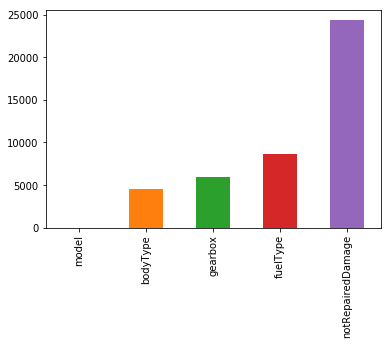

In [12]:
missing = Train_data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

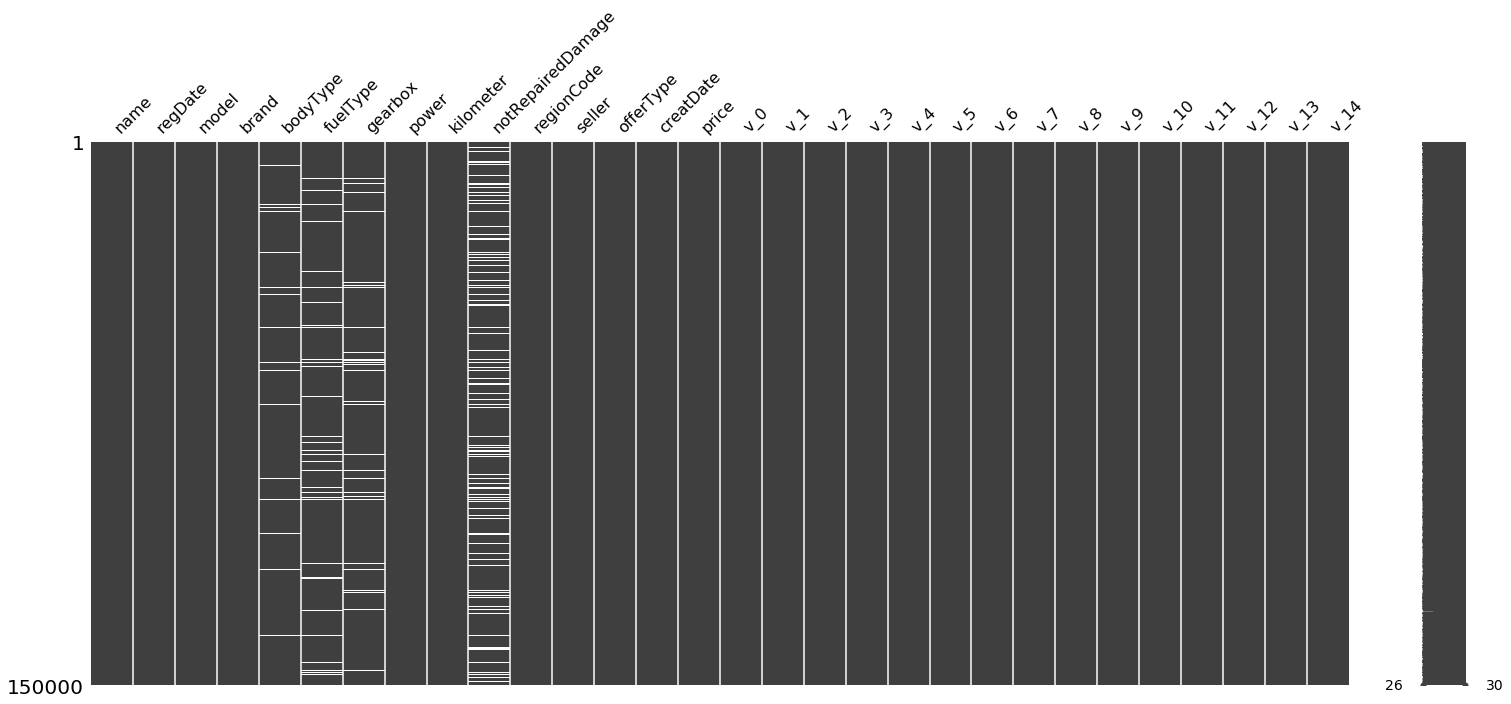

In [13]:
msno.matrix(Train_data.sample(Train_data.shape[0]))

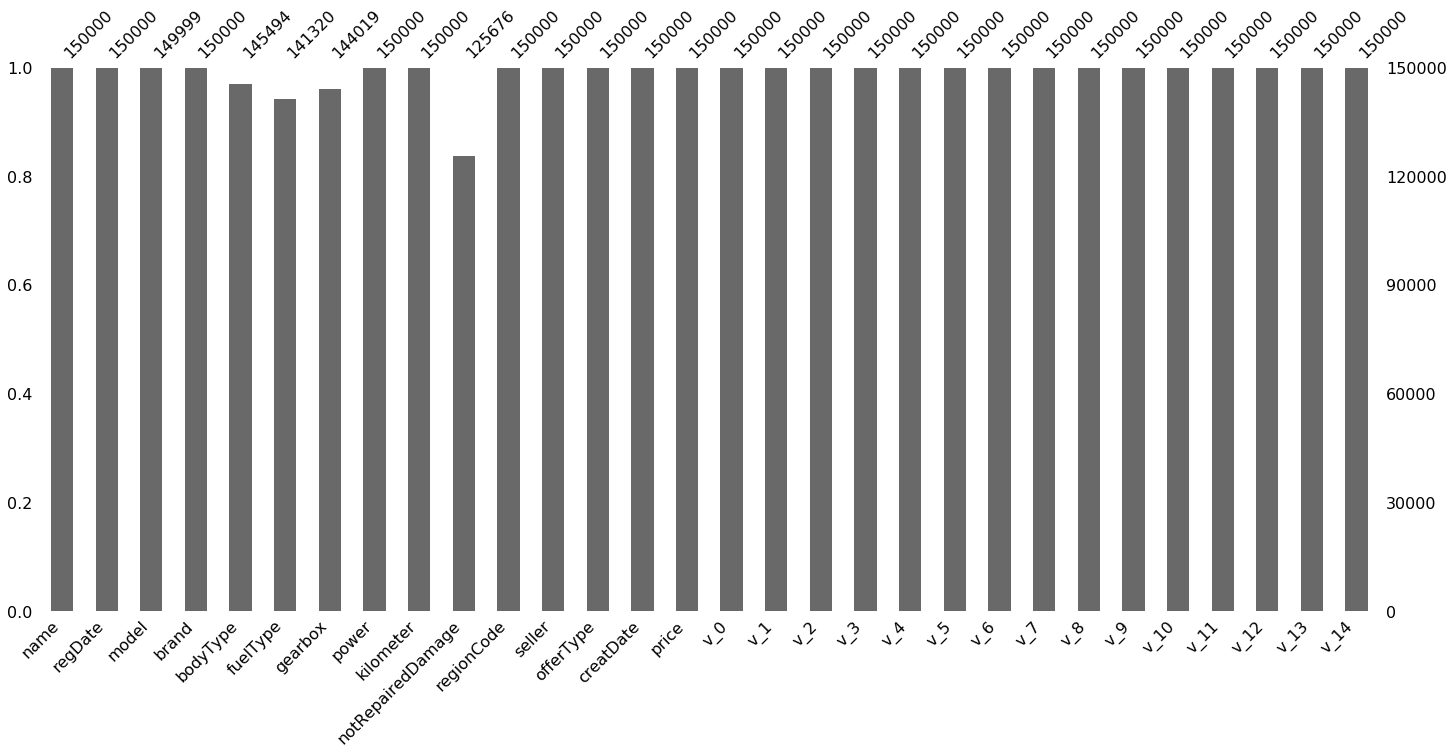

In [14]:
msno.bar(Train_data.sample(Train_data.shape[0]))

#### 缺失值情况大致分析
这里我们看到有缺失值的特征中，缺失值的占比在训练集和测试集中基本相同，不需要对缺失值占比不同的情况进行处理。

训练集的model中有一个值缺失，而测试集中没有，这里我们同seller中的异常数据一样暂时不做处理，观察样本是否离群。

### 3.特征标签分布情况观察

#### 标签分布情况
观察到标签不服从正态分布，对于无界约翰逊分布的拟合效果最好，可能需要在模型构建前对其进行转换

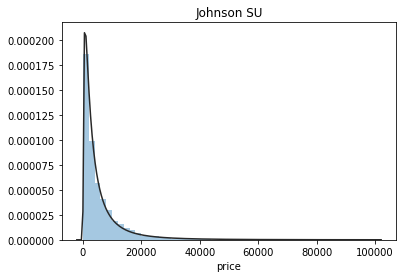

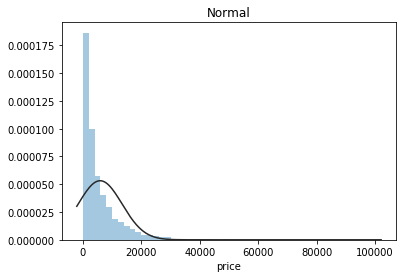

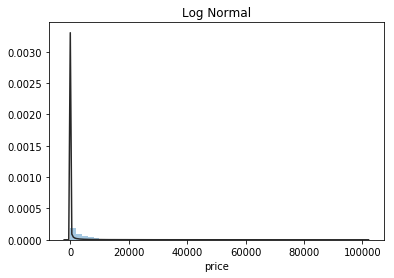

In [15]:
y = Train_data['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

Skewness: 3.346487
Kurtosis: 18.995183


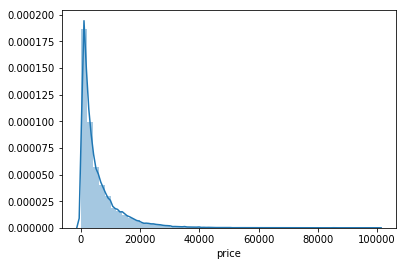

In [16]:
#偏度与峰度观察
sns.distplot(Train_data['price']);
print("Skewness: %f" % Train_data['price'].skew())
print("Kurtosis: %f" % Train_data['price'].kurt())

(array([   56.,   223.,  1508.,  6232., 22319., 35387., 39059., 33184.,
        11123.,   909.]),
 array([ 2.39789527,  3.30939729,  4.22089931,  5.13240133,  6.04390335,
         6.95540537,  7.86690739,  8.77840941,  9.68991143, 10.60141345,
        11.51291546]),
 <a list of 10 Patch objects>)

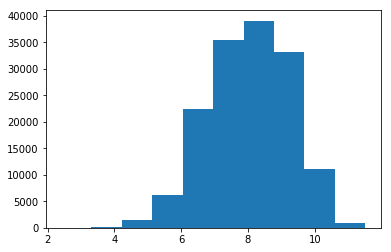

In [17]:
#转换为正态分布的变换
plt.hist(np.log(Train_data['price']), orientation = 'vertical',histtype = 'bar') 

#### 数字类特征分布情况观察

In [18]:
#提取数字特征与标签
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
numeric_features_test = numeric_features
numeric_features_test.append('price')

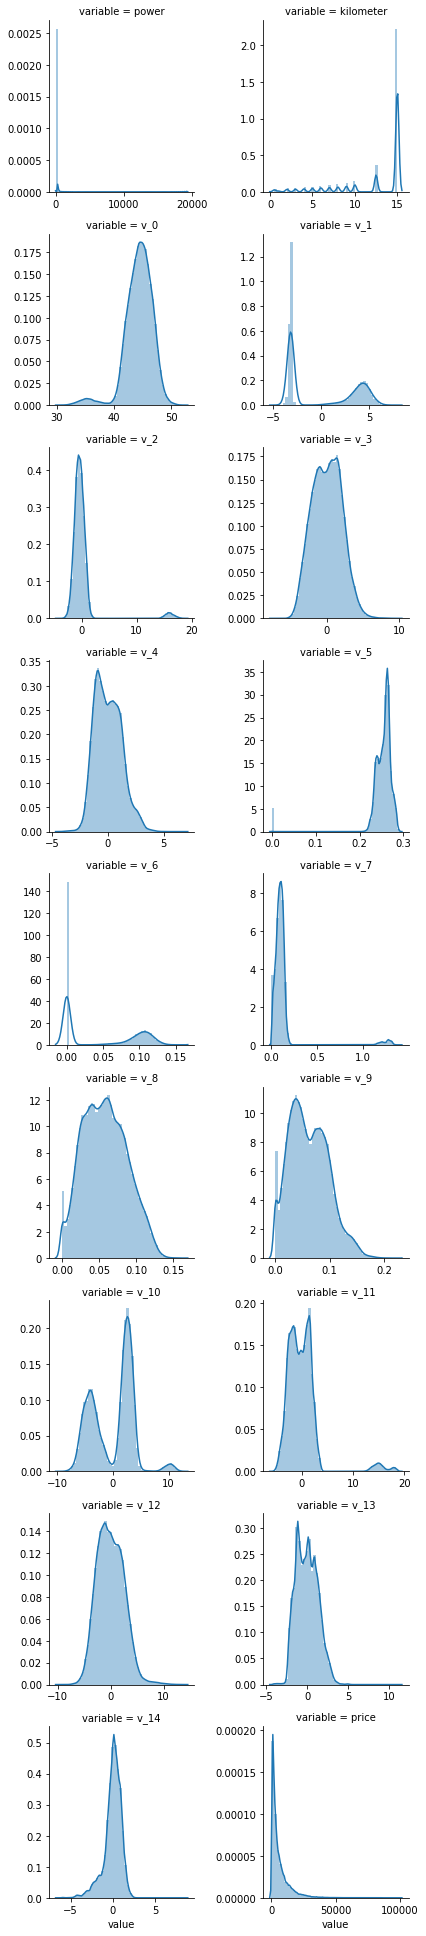

In [19]:
#分布情况观察
f = pd.melt(Train_data, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False)
g = g.map(sns.distplot, "value")

观察到部分v系列特征特征呈现双峰分布，且峰值距离较远，例如特征v_1，考虑在后续模型中分模型训练归属于不同峰值的数据，查看最终精度情况

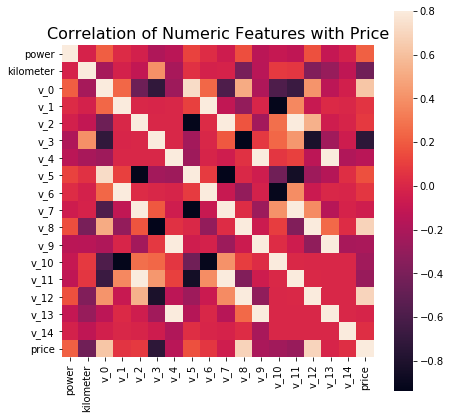

In [20]:
#相关性分析
price_numeric = Train_data[numeric_features]
correlation = price_numeric.corr()
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

观察到部分数值特征具有很强的相关性，例如v_2与v_7，在特征工程中应加入相关性较低的特征，故需要进行相关性消除的处理之后形成新的特征

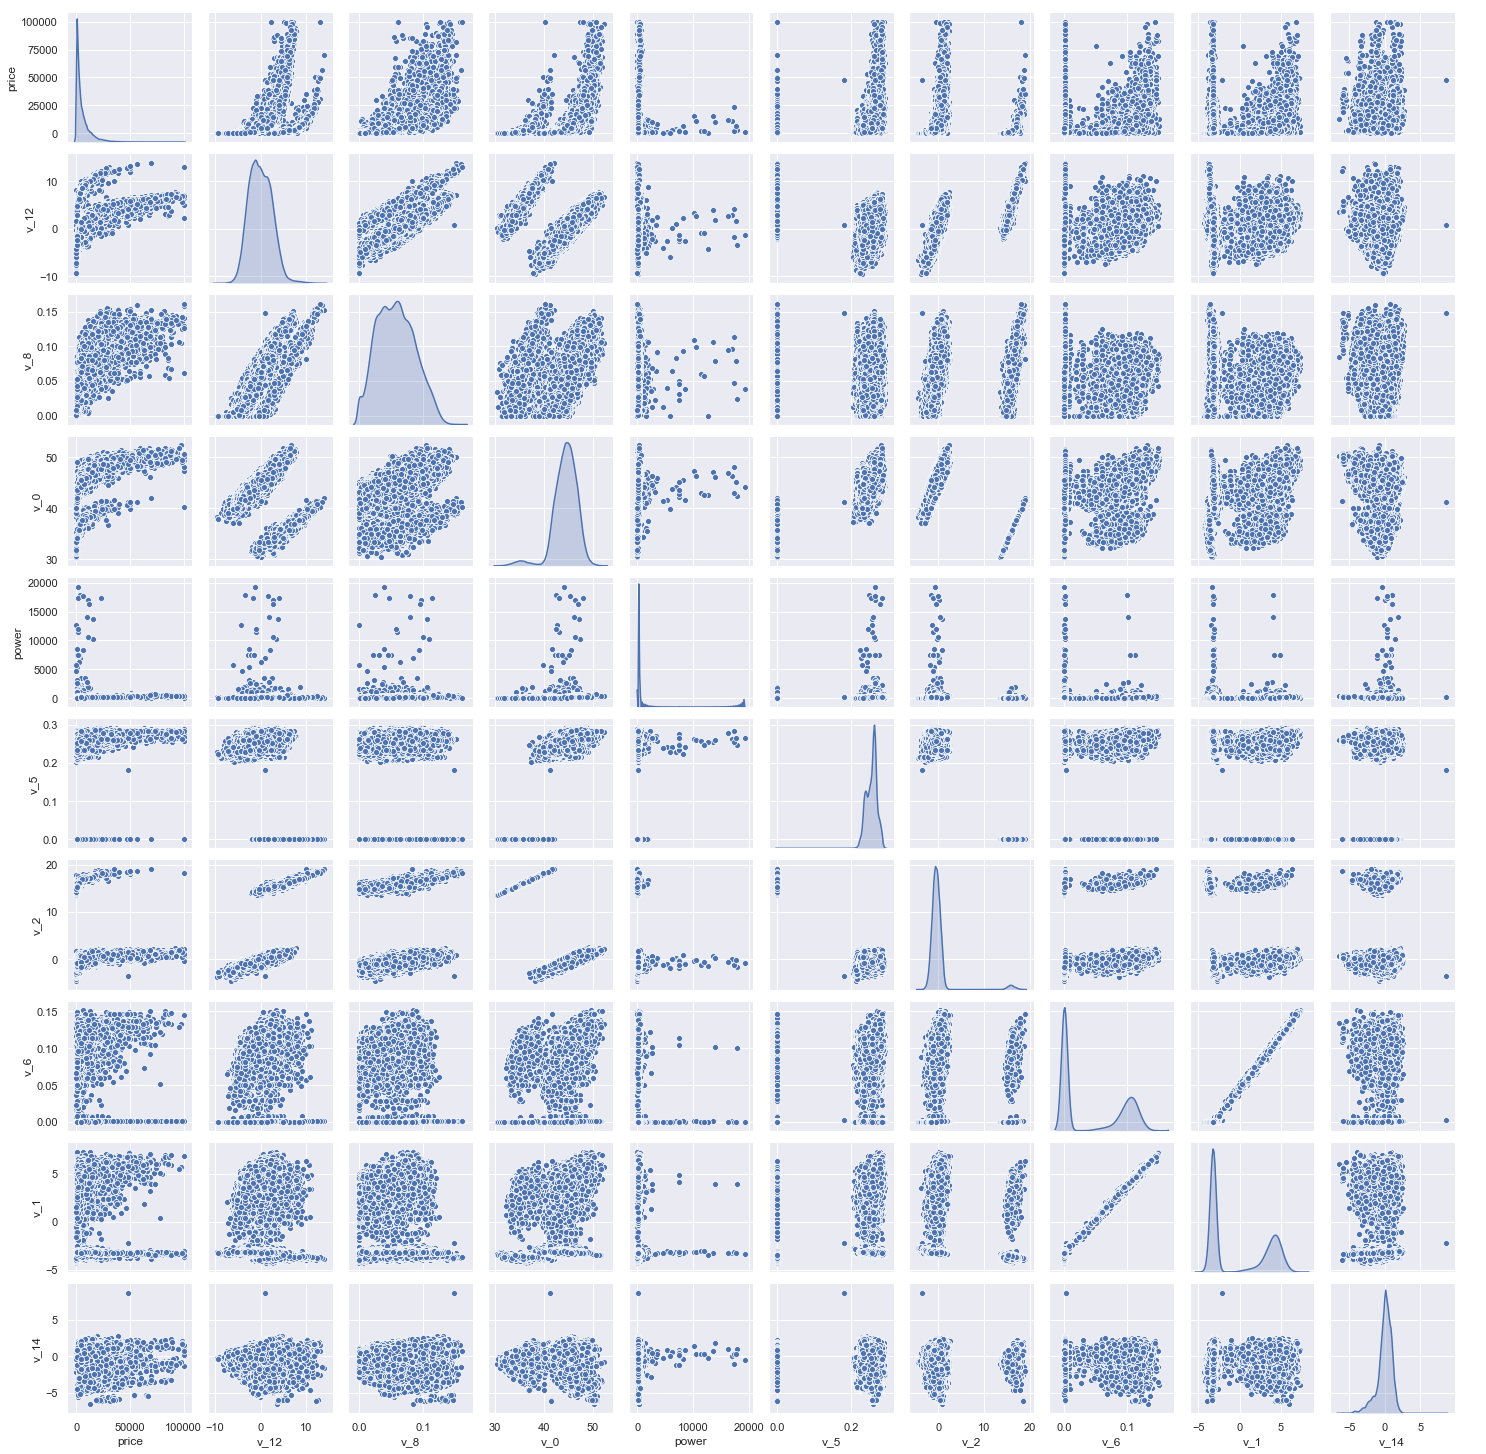

In [21]:
#相互之间的关系可视化
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

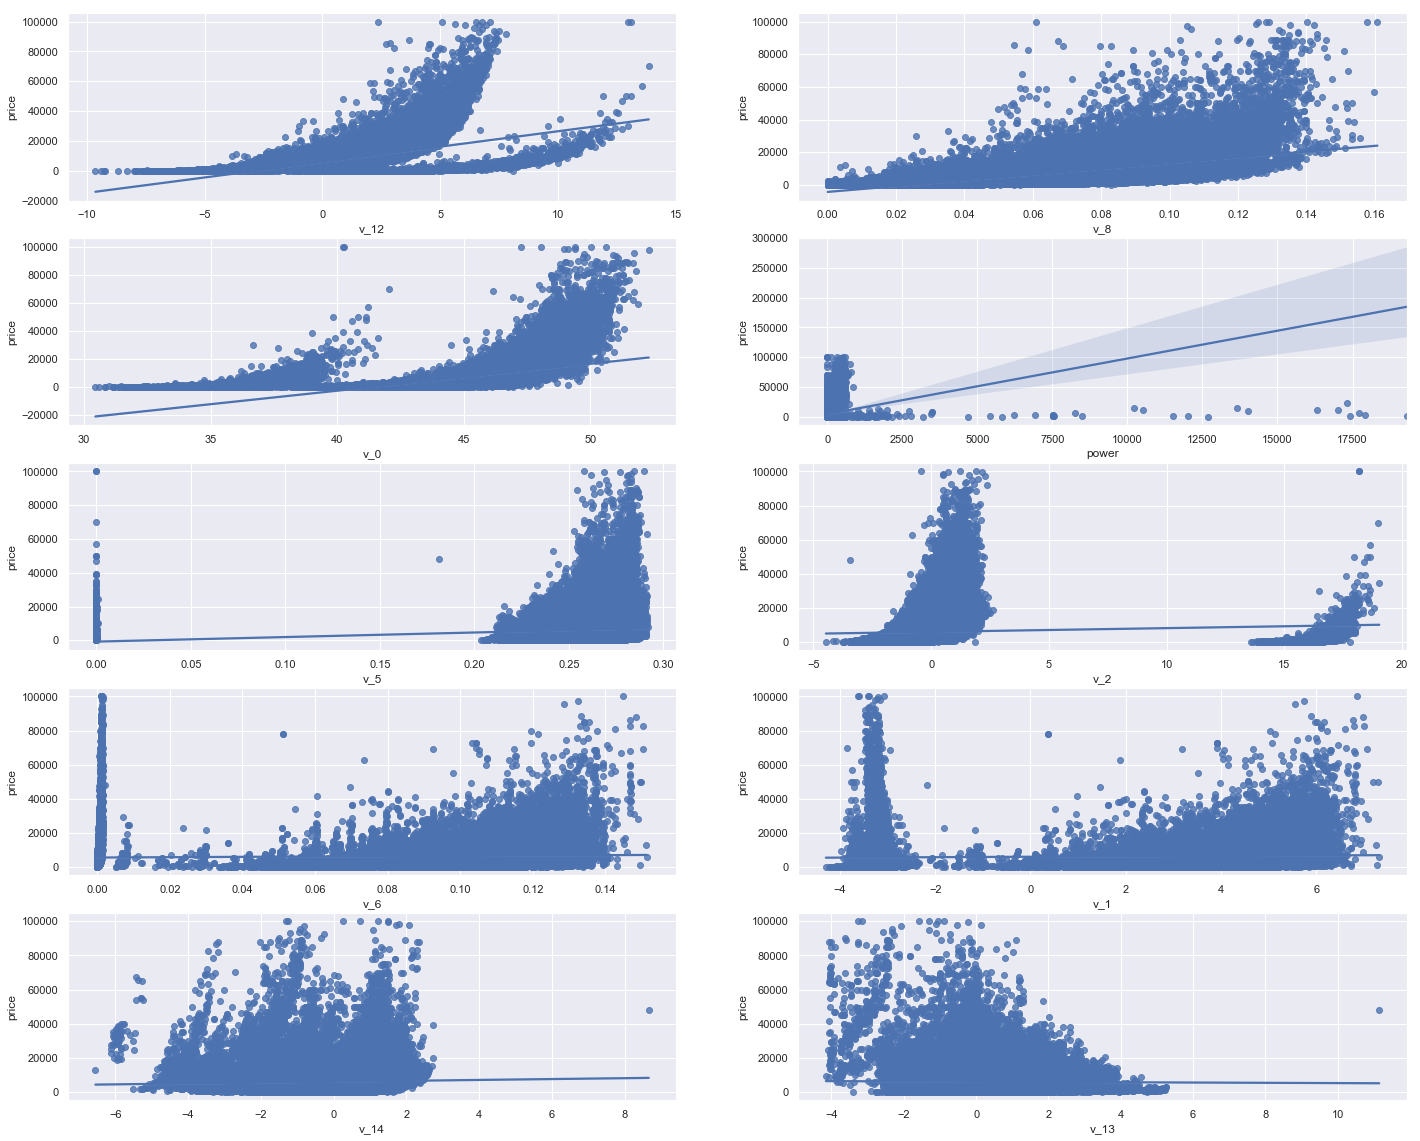

In [22]:
#多变量互相回归关系可视化
Y_train = Train_data['price']
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8), (ax9, ax10)) = plt.subplots(nrows=5, ncols=2, figsize=(24, 20))
# ['v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
v_12_scatter_plot = pd.concat([Y_train,Train_data['v_12']],axis = 1)
sns.regplot(x='v_12',y = 'price', data = v_12_scatter_plot,scatter= True, fit_reg=True, ax=ax1)

v_8_scatter_plot = pd.concat([Y_train,Train_data['v_8']],axis = 1)
sns.regplot(x='v_8',y = 'price',data = v_8_scatter_plot,scatter= True, fit_reg=True, ax=ax2)

v_0_scatter_plot = pd.concat([Y_train,Train_data['v_0']],axis = 1)
sns.regplot(x='v_0',y = 'price',data = v_0_scatter_plot,scatter= True, fit_reg=True, ax=ax3)

power_scatter_plot = pd.concat([Y_train,Train_data['power']],axis = 1)
sns.regplot(x='power',y = 'price',data = power_scatter_plot,scatter= True, fit_reg=True, ax=ax4)

v_5_scatter_plot = pd.concat([Y_train,Train_data['v_5']],axis = 1)
sns.regplot(x='v_5',y = 'price',data = v_5_scatter_plot,scatter= True, fit_reg=True, ax=ax5)

v_2_scatter_plot = pd.concat([Y_train,Train_data['v_2']],axis = 1)
sns.regplot(x='v_2',y = 'price',data = v_2_scatter_plot,scatter= True, fit_reg=True, ax=ax6)

v_6_scatter_plot = pd.concat([Y_train,Train_data['v_6']],axis = 1)
sns.regplot(x='v_6',y = 'price',data = v_6_scatter_plot,scatter= True, fit_reg=True, ax=ax7)

v_1_scatter_plot = pd.concat([Y_train,Train_data['v_1']],axis = 1)
sns.regplot(x='v_1',y = 'price',data = v_1_scatter_plot,scatter= True, fit_reg=True, ax=ax8)

v_14_scatter_plot = pd.concat([Y_train,Train_data['v_14']],axis = 1)
sns.regplot(x='v_14',y = 'price',data = v_14_scatter_plot,scatter= True, fit_reg=True, ax=ax9)

v_13_scatter_plot = pd.concat([Y_train,Train_data['v_13']],axis = 1)
sns.regplot(x='v_13',y = 'price',data = v_13_scatter_plot,scatter= True, fit_reg=True, ax=ax10)

观察到有数个离群点，将其显示出来查明原因

In [23]:
df = Train_data[Train_data['v_14']>=5]
print(df.head())
print('\n')

          name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
SaleID                                                                       
38424   148730  20150809    NaN     37       6.0       1.0      1.0    190   

        kilometer notRepairedDamage  regionCode  seller  offerType  creatDate  \
SaleID                                                                          
38424         2.0               0.0        1425       0          0   20160320   

        price        v_0       v_1       v_2       v_3       v_4       v_5  \
SaleID                                                                       
38424   47950  41.139365 -2.167089 -3.436008 -7.275037  6.829352  0.181562   

             v_6  v_7       v_8       v_9    v_10     v_11      v_12  \
SaleID                                                                 
38424   0.002092  0.0  0.148487  0.222787  1.6757 -3.25056  0.876001   

             v_13      v_14  
SaleID                       
38424   1

观察可得，该数据为唯一一个model特征缺失数据，应单独作为特殊样本，不应放入整体模型训练

In [24]:
error_point = Train_data[Train_data['v_5']>=0.15][Train_data['v_5']<=0.20]
print(error_point.head())

          name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
SaleID                                                                       
38424   148730  20150809    NaN     37       6.0       1.0      1.0    190   

        kilometer notRepairedDamage  regionCode  seller  offerType  creatDate  \
SaleID                                                                          
38424         2.0               0.0        1425       0          0   20160320   

        price        v_0       v_1       v_2       v_3       v_4       v_5  \
SaleID                                                                       
38424   47950  41.139365 -2.167089 -3.436008 -7.275037  6.829352  0.181562   

             v_6  v_7       v_8       v_9    v_10     v_11      v_12  \
SaleID                                                                 
38424   0.002092  0.0  0.148487  0.222787  1.6757 -3.25056  0.876001   

             v_13      v_14  
SaleID                       
38424   1

In [25]:
error_point = Train_data[Train_data['v_1']>=0.0][Train_data['v_1']<=1][Train_data['price']>50000]
print(error_point.head())

         name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
SaleID                                                                      
53114   78469  20051012    1.0     26       5.0       0.0      1.0    519   
91233   78469  20051010    1.0     26       5.0       0.0      1.0    519   

        kilometer notRepairedDamage  regionCode  seller  offerType  creatDate  \
SaleID                                                                          
53114         6.0               0.0        1170       0          0   20160308   
91233         6.0               0.0        1170       0          0   20160316   

        price        v_0       v_1       v_2       v_3       v_4       v_5  \
SaleID                                                                       
53114   77800  48.501844  0.365833  0.397739 -4.280941 -2.131159  0.283339   
91233   77850  48.501844  0.365833  0.397739 -4.280941 -2.131159  0.283339   

             v_6       v_7       v_8  v_9      v_10  

In [26]:
error_point = Train_data[Train_data['seller']==1.0]
print(error_point.head())

         name   regDate  model  brand  bodyType  fuelType  gearbox  power  \
SaleID                                                                      
75924   38600  20000804   66.0      9       2.0       0.0      0.0      0   

        kilometer notRepairedDamage  regionCode  seller  offerType  creatDate  \
SaleID                                                                          
75924        15.0               NaN        1259       1          0   20160315   

        price        v_0       v_1       v_2       v_3       v_4       v_5  \
SaleID                                                                       
75924     100  41.227073 -3.311367 -2.038434  5.523788  1.985284  0.236835   

        v_6       v_7  v_8       v_9      v_10      v_11      v_12      v_13  \
SaleID                                                                         
75924   0.0  0.091834  0.0  0.139018  4.420761  0.240866 -5.848067  0.440098   

            v_14  
SaleID            
75924  -1.

#### 异常点观测结果
* seller=1特殊点在各个数值型特征中未发现特别明显的离群情况，暂不予剔除


* model缺失的特殊点出现非常大的离群性质，预计会对模型造成影响，予以剔除


* 其余异常点同样予以剔除

In [27]:
#异常点处理
if Train_data[Train_data['v_14']>=5].shape[0]:
    Train_data = Train_data[Train_data['v_14']<=5]
    Train_data = Train_data[Train_data['name']!=78469]

#### 类别型特征数据可视化

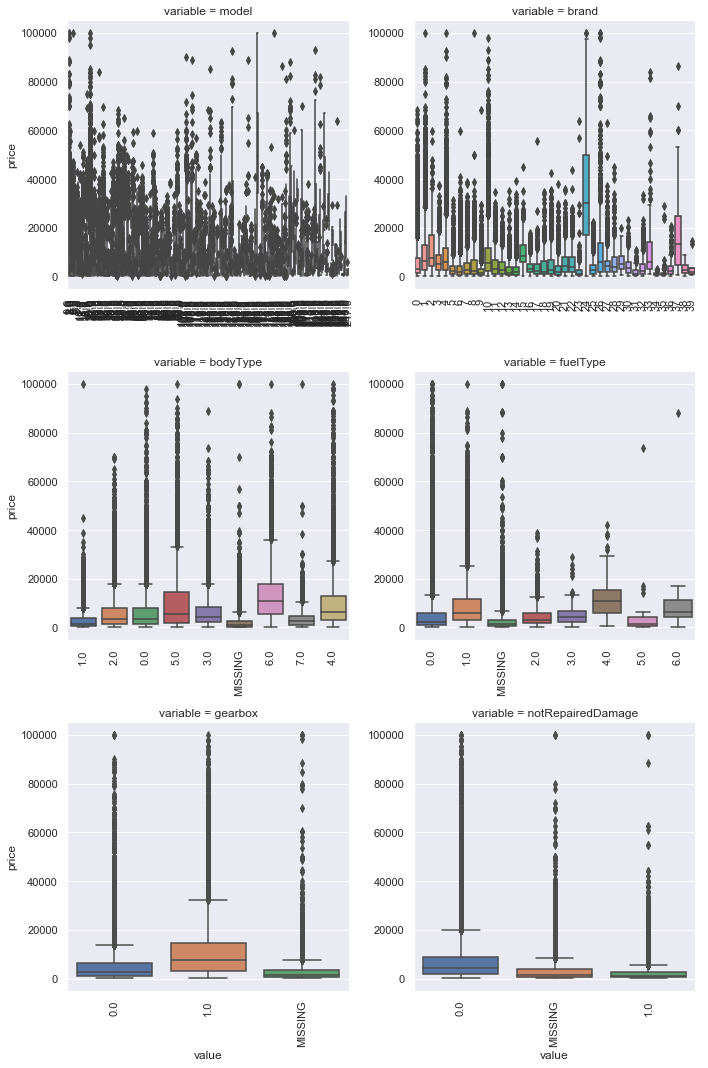

In [28]:
#箱型图
#categorical_features = ['name', 'model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage', 'regionCode',]
categorical_features = ['model', 'brand', 'bodyType', 'fuelType', 'gearbox', 'notRepairedDamage']
for c in categorical_features:
    Train_data[c] = Train_data[c].astype('category')
    if Train_data[c].isnull().any():
        Train_data[c] = Train_data[c].cat.add_categories(['MISSING'])
        Train_data[c] = Train_data[c].fillna('MISSING')

def boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(boxplot, "value", "price")

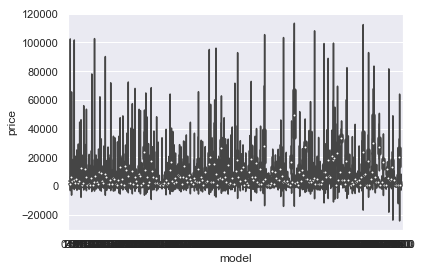

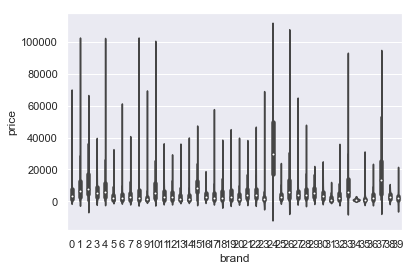

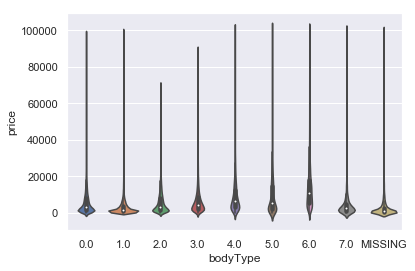

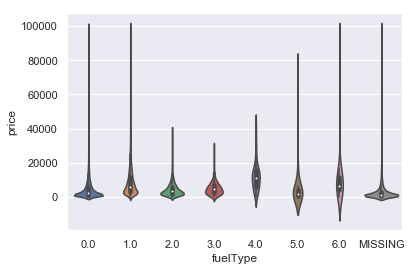

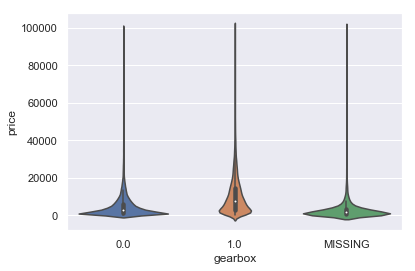

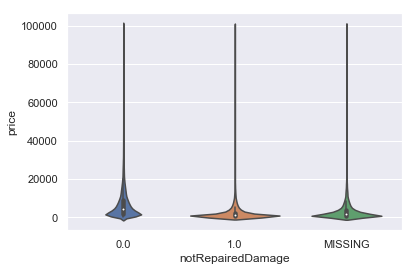

In [29]:
#小提琴图
catg_list = categorical_features
target = 'price'
for catg in catg_list :
    sns.violinplot(x=catg, y=target, data=Train_data)
    plt.show()

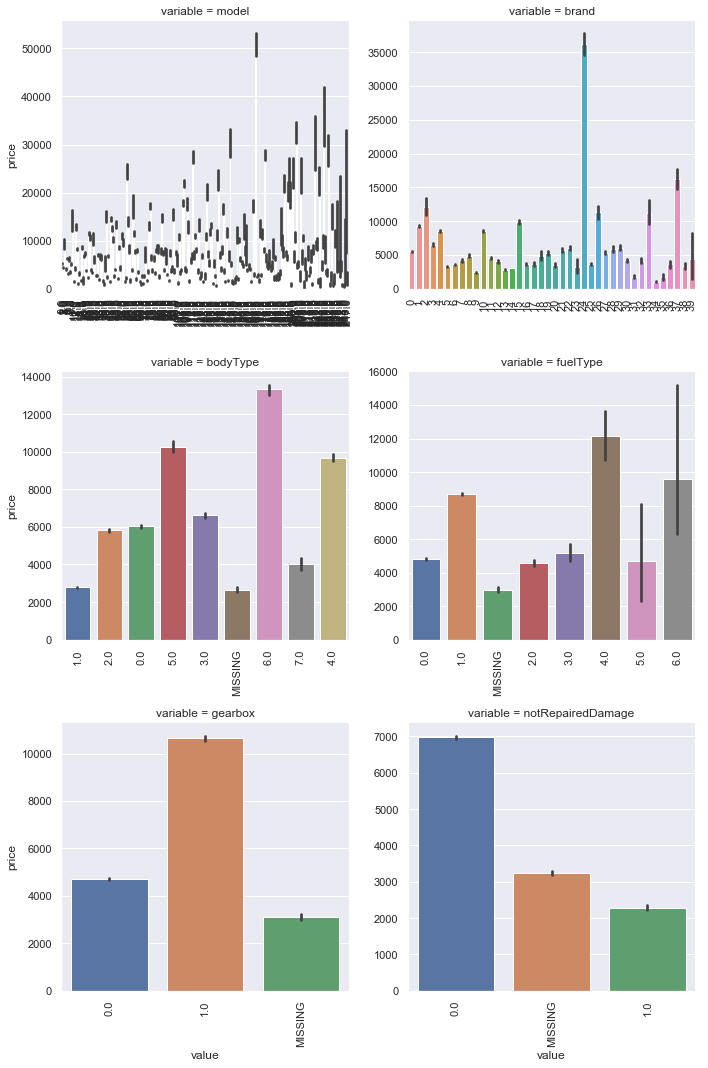

In [30]:
#柱形图
#其中黑线为数据95%致信区间
def bar_plot(x, y, **kwargs):
    sns.barplot(x=x, y=y)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(bar_plot, "value", "price")

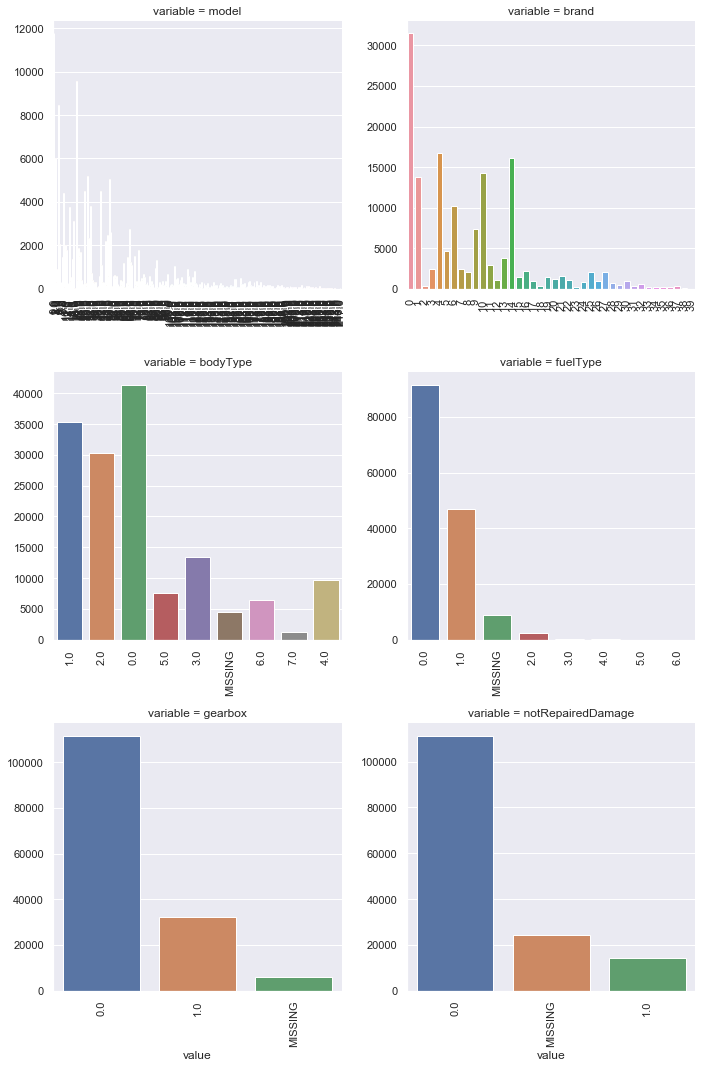

In [31]:
#类别频数
def count_plot(x,  **kwargs):
    sns.countplot(x=x)
    x=plt.xticks(rotation=90)

f = pd.melt(Train_data,  value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(count_plot, "value")


## 针对观察到情况的深入挖掘

#### 无相关性数值变量提取（未成功提取）

In [46]:
#施密特正交化(正在寻找去除相关性方法)
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
i = 0
param = [] #对训练集与测试集的相关性消除方法需保证一致性，故需要收集参数
for i in range(len(numeric_features)):
    param.append([])
for i in tqdm(range(len(numeric_features))):
    j = 0
    Train_data['zero_corr_'+numeric_features[i]] = Train_data[numeric_features[i]]
    while j < i:
        prm = ((Train_data[numeric_features[i]]*Train_data['zero_corr_'+numeric_features[j]]).sum())/((Train_data['zero_corr_'+numeric_features[j]]*Train_data['zero_corr_'+numeric_features[j]]).sum())
        param.append(prm)
        Train_data['zero_corr_'+numeric_features[i]] = Train_data['zero_corr_'+numeric_features[i]] - prm*(Train_data['zero_corr_'+numeric_features[i]])
        j += 1
Train_data.head()

100%|██████████| 17/17 [00:00<00:00, 24.77it/s]


,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,notRepairedDamage,regionCode,seller,offerType,creatDate,price,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14,zero_corr_power,zero_corr_kilometer,zero_corr_v_0,zero_corr_v_1,zero_corr_v_2,zero_corr_v_3,zero_corr_v_4,zero_corr_v_5,zero_corr_v_6,zero_corr_v_7,zero_corr_v_8,zero_corr_v_9,zero_corr_v_10,zero_corr_v_11,zero_corr_v_12,zero_corr_v_13,zero_corr_v_14
SaleID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,736,20040402,30.0,6,1,0,0,60,12.5,0.0,1046,0,0,20160404,1850,43.357796,3.966344,0.050257,2.159744,1.143786,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762,60,12.091917,-88.301603,3.986446,0.050403,2.108110,1.150999,0.236151,0.082265,-0.018866,0.014517,-0.010632,127657.101942,17412.216051,-509426.127247,-1.966273,-4.798572
1,2262,20030301,40.0,1,2,0,0,0,15.0,MISSING,4366,0,0,20160309,3600,45.305273,5.236112,0.137925,1.380657,-1.422165,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522,0,14.510300,-92.267794,5.262649,0.138325,1.347649,-1.431133,0.265311,0.097603,-0.019766,0.016923,-0.002245,217079.815436,13017.341042,-216849.955407,4.259124,-1.287938
2,14874,20040403,115.0,15,1,0,0,163,12.5,0.0,2806,0,0,20160402,6222,45.978359,4.823792,1.319524,-0.998467,-0.996911,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963,163,12.091917,-93.638588,4.848240,1.323348,-0.974596,-1.003197,0.251917,0.092690,-0.024050,0.039558,-0.002953,214699.586748,11199.313188,329400.594701,2.058729,1.206317
3,71865,19960908,109.0,10,0,0,1,193,15.0,0.0,434,0,0,20160312,2400,45.687478,4.492574,-0.050616,0.883600,-2.228079,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699,193,14.510300,-93.046186,4.515343,-0.050763,0.862475,-2.242128,0.274846,0.088970,-0.017761,0.021248,0.000000,199764.615791,7985.124084,-105610.719209,6.028562,2.511115
4,111080,20120103,110.0,5,1,0,0,68,5.0,0.0,6977,0,0,20160313,5200,44.383511,2.031433,0.572169,-1.571239,2.246088,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482,68,4.836767,-90.390552,2.041729,0.573827,-1.533674,2.260252,0.228496,0.059048,-0.013380,0.050150,-0.013257,83998.982066,5655.565409,195938.310691,-7.008037,-10.090015


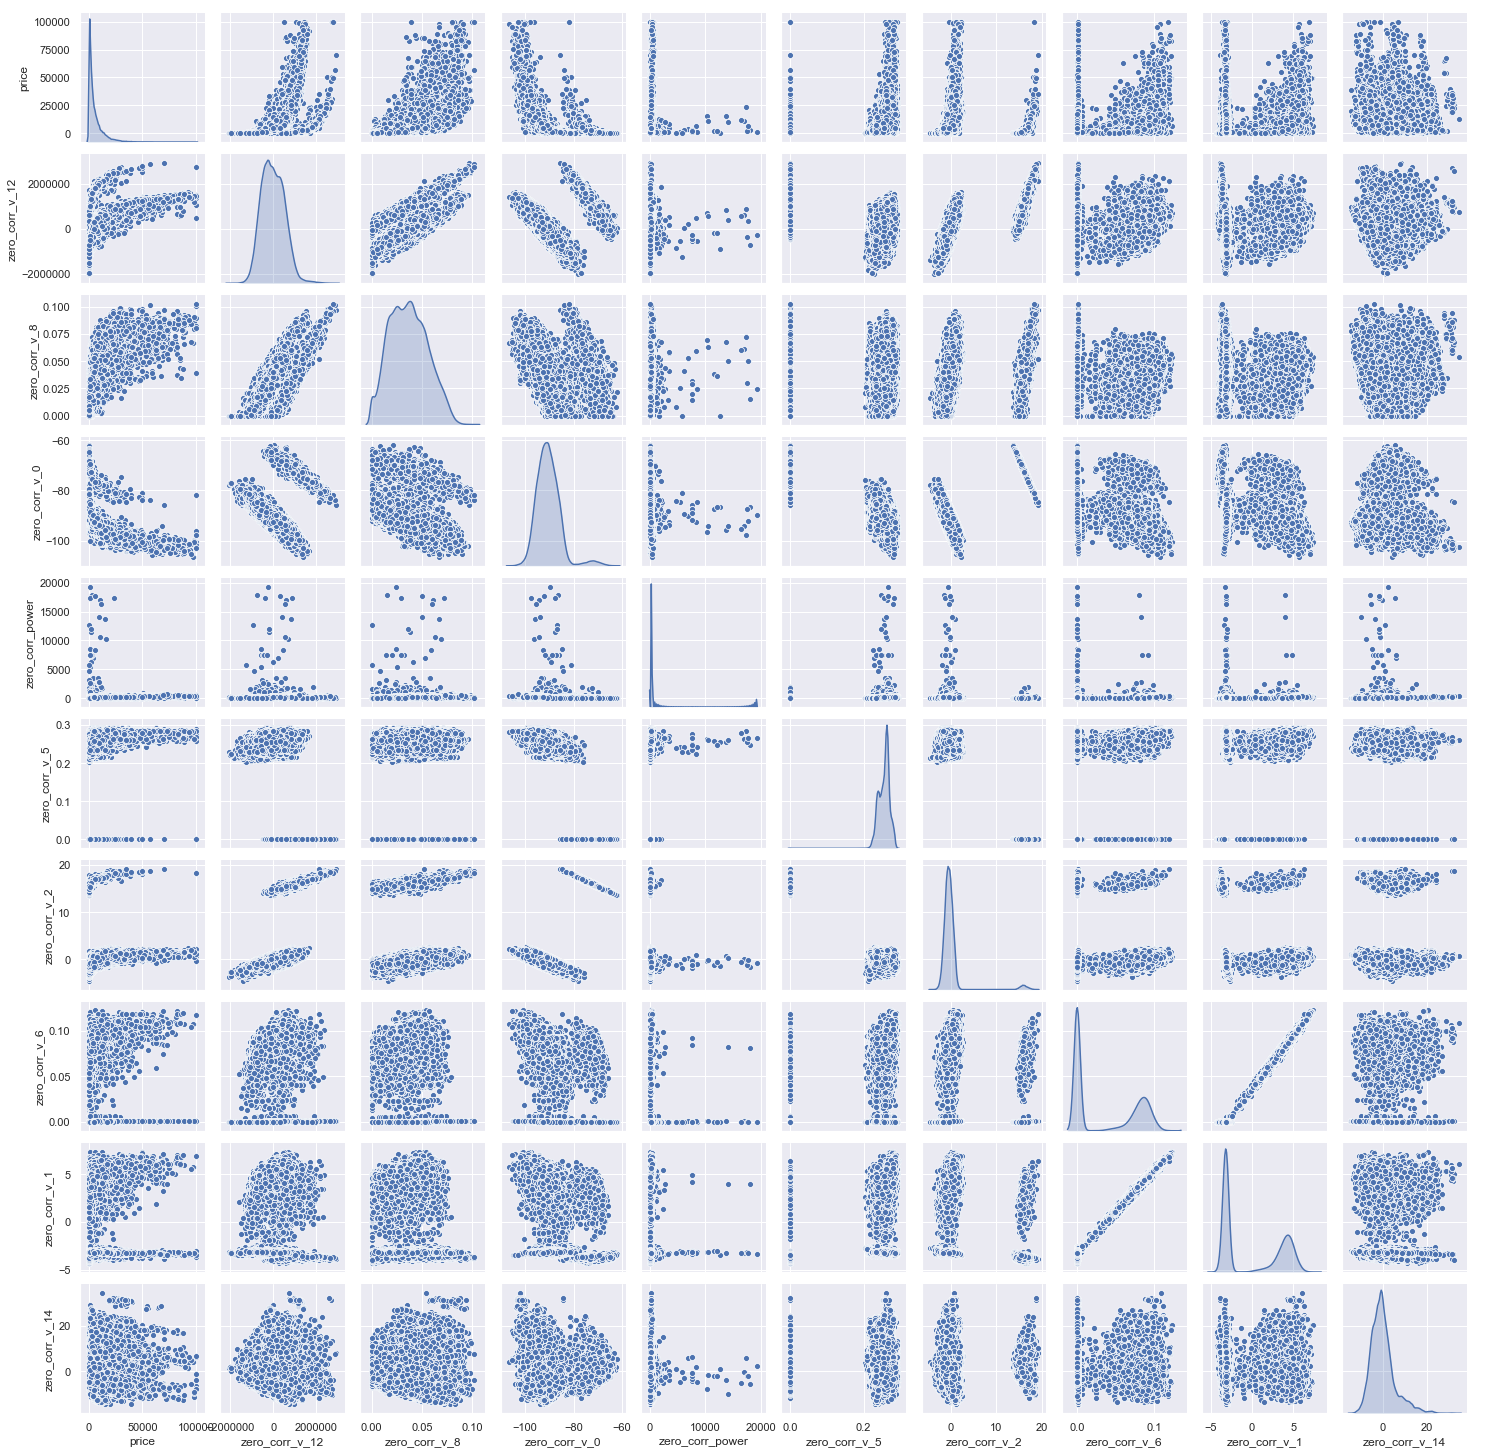

In [47]:
#新特征显示
sns.set()
columns = ['price', 'v_12', 'v_8' , 'v_0', 'power', 'v_5',  'v_2', 'v_6', 'v_1', 'v_14']
for i in range(len(columns)-1):
    columns[i+1] = 'zero_corr_'+columns[i+1]
sns.pairplot(Train_data[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14', 'price']


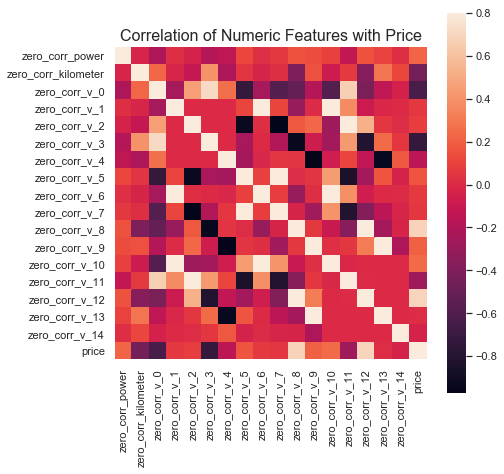

In [48]:
numeric_features = ['power', 'kilometer', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14' ]
numeric_features.append('price')
zero_corr_numeric_features = numeric_features
print(zero_corr_numeric_features)
for i in range(len(zero_corr_numeric_features)):
    if zero_corr_numeric_features[i] == 'price':
        continue
    zero_corr_numeric_features[i] = 'zero_corr_'+zero_corr_numeric_features[i]
price_numeric = Train_data[zero_corr_numeric_features]
correlation = price_numeric.corr()
f , ax = plt.subplots(figsize = (7, 7))
plt.title('Correlation of Numeric Features with Price',y=1,size=16)
sns.heatmap(correlation,square = True,  vmax=0.8)

## 总结

数据探索在机器学习中我们一般称为EDA（Exploratory Data Analysis）：

是指对已有的数据（特别是调查或观察得来的原始数据）在尽量少的先验假定下进行探索，通过作图、制表、方程拟合、计算特征量等手段探索数据的结构和规律的一种数据分析方法。

数据探索有利于我们发现数据的一些特性，数据之间的关联性，对于后续的特征构建是很有帮助的。

本例中除了在基础的方法分析下分析了数据某些特性，并尝试找到消除相关性的方法（暂未有结果）

剔除了部分异常值

考虑了部分数据应该分组训练模型的情况